<a href="https://colab.research.google.com/github/caleboutlar/caleb.outlar/blob/master/NSLS_DataAnal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import glob as gb
import h5py as hp5

In [2]:
h5file ="/content/bmm_training_data.hdf5"

In [4]:
f = hp5.File(h5file, 'r')

In [ ]:
list(f.keys())

In [6]:
list(f.keys())[0]

'001cae78-9614-40e0-962a-37424c86ddbb'

In [8]:
list(f['001cae78-9614-40e0-962a-37424c86ddbb'].attrs)

['score']

In [11]:
score_list = []
data_list = []
for key in f.keys():
    score_list.append(f[key].attrs['score'])
    data_list.append(np.array(f[key]['mu']))

score_list = np.array(score_list)
data_list = np.array(data_list)

In [12]:
list(f[list(f.keys())[0]].attrs)

['score']

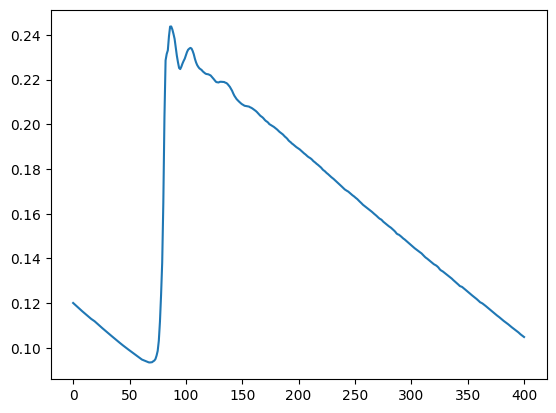

In [13]:
plt.Figure()
plt.plot(data_list[50])

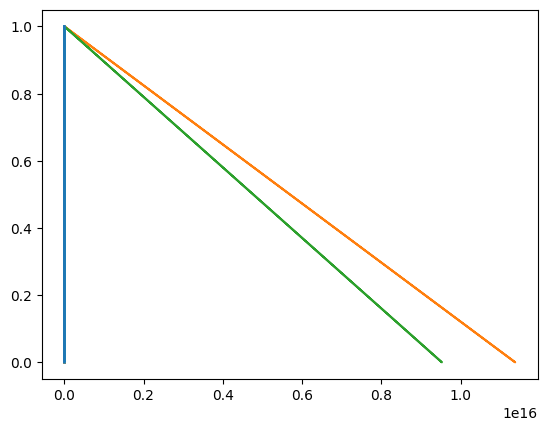

In [20]:
plt.Figure()
plt.plot(data_list, score_list)

In [23]:
my_datf = pd.DataFrame(data_list, index=score_list).T

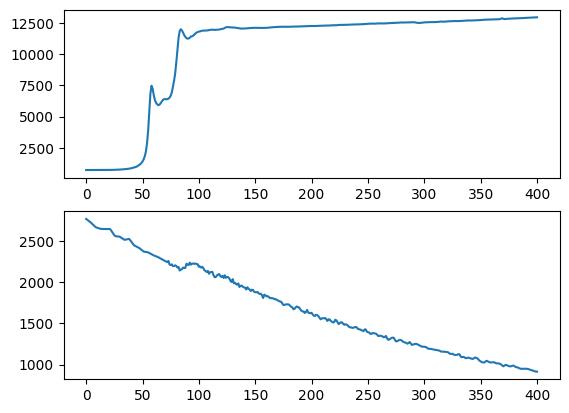

In [24]:
plt.Figure()
plt.subplot(211)
plt.plot(my_datf.loc[:,1].mean(axis=1))
plt.subplot(212)
plt.plot(my_datf.loc[:,0].sample(axis=1))

In [47]:
import scipy as sp

In [46]:
import scipy.cluster.hierarchy as shc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [50]:
trainX, X, trainy, y = train_test_split(data_list, score_list, random_state=0)
scaler = StandardScaler()
scaler.fit(trainX)

StandardScaler()

In [70]:
clf = RandomForestClassifier(random_state=0)
clf.fit(scaler.transform(trainX), trainy)

RandomForestClassifier(random_state=0)

In [34]:
def gib_good_bmm():
    return np.array(my_datf.loc[:,1].T.sample(1))[0]

def gib_bad_bmm():
    return np.array(my_datf.loc[:,0].T.sample(1))[0]

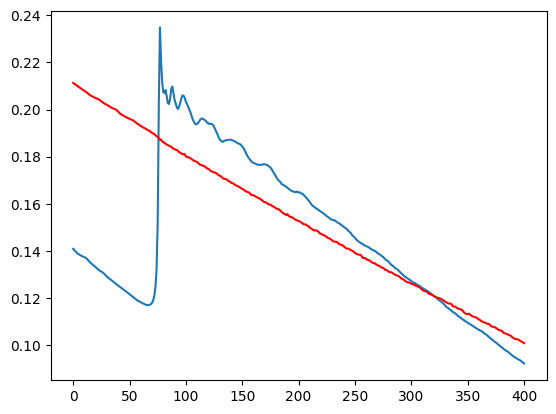

In [36]:
plt.Figure()
plt.plot(gib_good_bmm())
plt.plot(gib_bad_bmm(), color= "r")

In [72]:
good_score = 0
for i in range(100):
    m = scaler.transform([gib_good_bmm(),])
    if clf.predict(m)[0] == 1:
       good_score += 1

print(f'Good Score: {good_score}')

bad_score = 0
for i in range(100):
    m = scaler.transform([gib_good_bmm(),])
    if clf.predict(m)[0] == 0:
        bad_score +=1

print(f'Bad Score: {bad_score}')


Good Score: 100
Bad Score: 0
